<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 3 / NOTE 1*

# 📝 Assignment
---
# Choose your ML problems

이번 스프린트에서는 포트폴리오 프로젝트를 위해 수강생 각자가 정한 데이터셋을 사용하여 과제를 수행합니다. 프로젝트를 위한 데이터를 최종 선택하기 전에 여러 가능한 데이터세트를 살펴보고 간단한 모델까지 학습해 보는 것을 추천드립니다.

### 1) 타겟으로 사용할 특성을 선택합니다.
**(Urclass Quiz)** 여러분들이 프로젝트에 사용할 데이터셋과 타겟특성에 대해 아래의 내용을 포함하여 간략하게 설명해주세요. 
* `df.dtypes`을 사용해서 타겟특성의 데이터 타입 확인
* `df.describe()`를 사용해서 타겟특성의 대표값 확인(실수-평균, 범주형-최빈값)

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd

train=pd.read_csv('/content/drive/MyDrive/dhata/crypto/train/train.csv')

In [22]:
train.dtypes # 타겟 데이터는 실수형

timestamp      int64
Asset_ID       int64
Count        float64
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
VWAP         float64
Target       float64
dtype: object

In [25]:
train.shape 

(24236806, 10)

In [24]:
train.describe() # 7.12e-06

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
count,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423681e+07,2.423680e+07,2.348647e+07
mean,1.577120e+09,6.292544e+00,2.864593e+02,1.432640e+03,1.436350e+03,1.429568e+03,1.432640e+03,2.868530e+05,NaN,7.121752e-06
std,3.323350e+07,4.091861e+00,8.673982e+02,6.029605e+03,6.039482e+03,6.020261e+03,6.029611e+03,2.433935e+06,NaN,5.679042e-03
min,1.514765e+09,0.000000e+00,1.000000e+00,1.170400e-03,1.195000e-03,2.000000e-04,1.171400e-03,-3.662812e-01,-inf,-5.093509e-01
25%,1.549011e+09,3.000000e+00,1.900000e+01,2.676500e-01,2.681600e-01,2.669000e-01,2.676484e-01,1.410725e+02,2.676368e-01,-1.694354e-03
50%,1.578372e+09,6.000000e+00,6.400000e+01,1.428860e+01,1.431250e+01,1.426300e+01,1.428920e+01,1.295415e+03,1.428769e+01,-4.289844e-05
75%,1.606198e+09,9.000000e+00,2.210000e+02,2.288743e+02,2.293000e+02,2.284200e+02,2.288729e+02,2.729764e+04,2.288728e+02,1.601520e-03
max,1.632182e+09,1.300000e+01,1.650160e+05,6.480594e+04,6.490000e+04,6.467053e+04,6.480854e+04,7.597554e+08,inf,9.641699e-01


##위에서 보시다시피 2천4백만 개의 관측치와 10개의 특성을 가진 데이터라 사실 잘 될 것 같지 않지만, 제 컴퓨터로 할 수 있는데까지 한 번 해보겠습니다.

##Open, High, Low, Close는 각각 미국 달러로 해당 '분'에 거래된 가격입니다. Count는 그 분에 이뤄진 거래 숫자입니다.

##가장 중요한 타겟은 거래량 백분율 차이에 로그를 취한 값입니다.

### 2) 풀고자 하는 문제가 분류/회귀 문제인지 정합니다.
**(Urclass Quiz)** 다이아몬드를 보관하기 위해 금고를 만들었습니다. 금고가 너무 작아서 가격이 상위 25%인 것만 보관하려고 합니다. 이를 위해 'price' 특성을 이용해 금고에 보관할 다이아몬드와 그렇지 않은 것으로 분류하는 이진분류 컬럼을 만들어 타겟 특성으로 사용할 것입니다. 타겟 특성의 최빈값의 빈도수를 적어주세요.
- 'top25'라는 새로운 타겟변수(컬럼)를 만들어주세요.
- 상위 25% 이상 True, 상위 25% 미만 False

   

In [1]:
### 이곳에서 과제를 진행해 주세요 ### 
import seaborn as sns
diamonds = sns.load_dataset('diamonds')

In [7]:
diamonds['price'].sort_values(ascending=False)

27749    18823
27748    18818
27747    18806
27746    18804
27745    18803
         ...  
4          335
3          334
2          327
1          326
0          326
Name: price, Length: 53940, dtype: int64

In [11]:
criteria=diamonds.price.sort_values(ascending=False).quantile(.75) # 기준

In [12]:
def top25(x):
  if x>=criteria: # 기준보다 크거나 같으면 1을 출력, 아니면 0을 출력하는 함수
    return 1
  else:
    return 0

diamonds['top25']=diamonds['price'].apply(top25)

In [18]:
diamonds.top25.value_counts('0') # 잘 나뉘었는지 확인

0    0.75
1    0.25
Name: top25, dtype: float64

In [26]:
diamonds.top25.value_counts()

0    40455
1    13485
Name: top25, dtype: int64

### 3) 타겟의 분포를 분석하고 사용할 평가지표를 선택합니다. 평가지표를 선택한 이유를 설명하세요.
- 분류: 클래스가 몇 개인지? 클래스 비율이 어떤지(balance or imbalance)
- 회귀: 타겟 분포가 right-skewed 인지? log-transform을 사용할 것인지?
- 분류: 다수 클래스(majority class) 비율이 50%~70% 인 경우 정확도(accuracy)만 사용해도 무방합니다. 하지만 범위를 넘어설 경우 정확도만을 사용해서는 모델을 잘못 이해할 수 있습니다. 어떤 평가지표를 사용해야 할까요?
- 회귀: MAE, RMSE, R^2 등을 사용할 수 있습니다.

---


**(Urclass Quiz)** 여러분들이 프로젝트에 사용할 데이터의 기준모델과 사용할 평가지표를 제출해주세요.

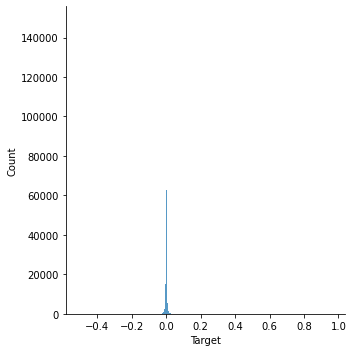

In [28]:
target=train['Target']
sns.displot(target)

In [30]:
predict=target.mean()

In [31]:
errors=predict-target
MAE=errors.abs().mean()

In [32]:
MAE

0.002996397224638032

## 🔥 도전과제(Github - Discussion)

### 4) 실무에서 데이터분석가/데이터엔지니어/데이터사이언티스트에게 중요한 역량이 무엇이라고 생각하며, 어떤 어려움을 겪게 될 것 같은지와 어떤 능력이 필요할 지 논의해 보세요. 또한, 섹션2 프로젝트에 앞서 본인이 얻고자 하는 점이나 다짐 등을 서로 공유해 보세요. 


In [ ]:
### 이곳에서 과제를 진행해 주세요 ### 